In [39]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline #don't need this any more woop woop
plt.rcParams['font.family'] = 'times new roman'
plt.rcParams['font.size'] = 16

UsageError: unrecognized arguments: #don't need this any more woop woop


In [40]:
# === PARAMETERS ===
nx = 41
L = 2.0
dx = L / (nx-1)
nu = 0.3
sigma = 0.2
dt = sigma * dx**2 / nu
nt = 20

In [41]:
x = np.linspace(0.0, L, num=nx)
u0 = np.ones(nx)
mask = np.where(np.logical_and(x >= 0.5, x<= 1.0))
u0[mask] = 2.0

In [42]:
u = u0.copy()
for n in range(nt):
    un = u.copy()
    for i in range(1, nx - 1):
        u[i] = un[i] + sigma * (un[i-1] - 2*un[i] + un[i+1])
    #u[0] = 1.0
    #u[-1] = 1.0
u_naive = u

In [43]:
u2 = u0.copy()
for n in range(nt):
    u2[1:-1] = u2[1:-1] + nu * dt / dx**2 * (u2[2:] - 2 * u2[1:-1] + u2[:-2])

Text(0, 0.5, 'u')

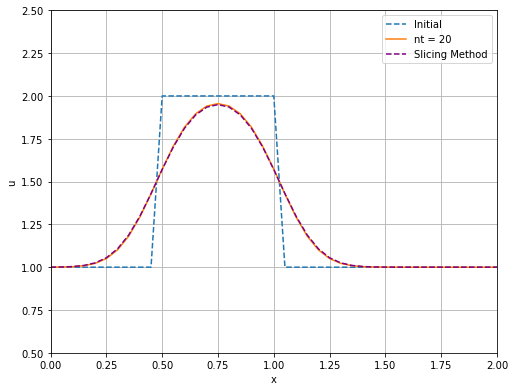

In [44]:
plt.figure(figsize=[8,6.3])
plt.plot(x,u0, label='Initial', linestyle='--')
plt.plot(x,un,label='nt = {}'.format(nt))
plt.plot(x, u2, label='Slicing Method', color='purple', linestyle='--')
plt.legend()
plt.grid()
plt.xlim(0., 2.0)
plt.ylim(0.5,2.5)
plt.xlabel('x')
plt.ylabel('u')

In [45]:
from matplotlib import animation
from IPython.display import HTML

In [46]:
def diffusion(u0, sigma=0.5, nt=20):
    u_hist = [u0.copy()]
    for n in range(nt):
        u[1:-1] = u[1:-1] + sigma * (u[2:] - 2*u[1:-1] + u[:-2])
    return u_hist

In [54]:
u_hist = diffusion(u0, sigma=sigma, nt=nt)

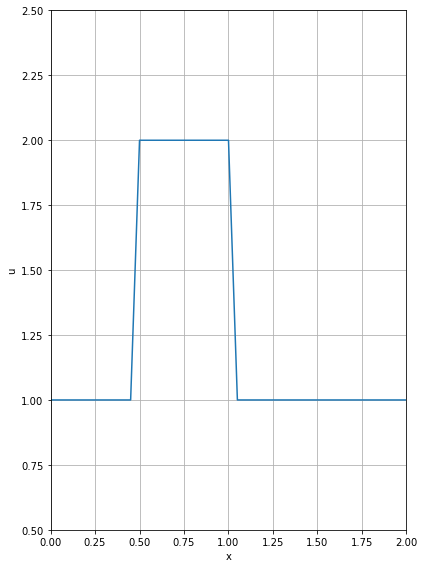

In [55]:
fig = plt.figure(figsize=[6.0,8.0])
plt.xlabel('x')
plt.ylabel('u')
plt.grid()
line = plt.plot(x, u0)[0]
plt.xlim(0.0, L)
plt.ylim(0.5, 2.5)
fig.tight_layout()



In [56]:
def update_plot(n, u_hist):
    """
    Update the line y-data of the Matplotlib figure.
    
    Parameters
    ----------
    n : integer
        The time-step index.
    u_hist : list of numpy.ndarray objects
        The history of the numerical solution.
    """
    fig.suptitle('Time step {:0>2}'.format(n))
    line.set_ydata(u_hist[n])

In [61]:
anim = animation.FuncAnimation(fig, update_plot,
                               frames=nt, fargs=(u_hist,),
                               interval=100)

In [63]:
from IPython.core.display import HTML
HTML(anim.to_html5_video())

IndexError: list index out of range

In [52]:
import ipywidgets

In [53]:
nt_slider = ipywidgets.IntSlider(value=0, min=0, step=1,
                                description='Time Step')
w = ipywidgets.interactive(update_plot, n=nt_slider,
                          u_hist=ipywidgets.fixed(u_hist),
                          x=ipywidgets.fixed(x))